# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        response = requests.get(city_url)    
        # Parse the JSON and retrieve data
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | turpan
Processing Record 3 of Set 1 | ca mau
Processing Record 4 of Set 1 | igarka
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | sinabang
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | nadi
Processing Record 9 of Set 1 | hamilton
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | porto velho
Processing Record 14 of Set 1 | stanley
Processing Record 15 of Set 1 | wenling
Processing Record 16 of Set 1 | chonchi
Processing Record 17 of Set 1 | whitehorse
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | dera bugti
Processing Record 21 of Set 1 | rikaze
Processing Record 22 of Set 1 | cartagena del chaira
Processing Record 23 o

Processing Record 41 of Set 4 | rio gallegos
Processing Record 42 of Set 4 | carutapera
Processing Record 43 of Set 4 | yaren
Processing Record 44 of Set 4 | port blair
Processing Record 45 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 46 of Set 4 | coquimbo
Processing Record 47 of Set 4 | myory
Processing Record 48 of Set 4 | laoag
Processing Record 49 of Set 4 | susuman
Processing Record 0 of Set 5 | sitka
Processing Record 1 of Set 5 | mitsamiouli
Processing Record 2 of Set 5 | sabang
Processing Record 3 of Set 5 | yangor
City not found. Skipping...
Processing Record 4 of Set 5 | alta
Processing Record 5 of Set 5 | san antonio de pale
Processing Record 6 of Set 5 | fisterra
Processing Record 7 of Set 5 | morehead city
Processing Record 8 of Set 5 | piti village
Processing Record 9 of Set 5 | mejit
Processing Record 10 of Set 5 | laojunmiao
Processing Record 11 of Set 5 | talcahuano
Processing Record 12 of Set 5 | tenenkou
Processing Record 13 of Set 5 | khandyg

Processing Record 31 of Set 8 | oranjemund
Processing Record 32 of Set 8 | luderitz
Processing Record 33 of Set 8 | russas
Processing Record 34 of Set 8 | malakanagiri
Processing Record 35 of Set 8 | lazaro cardenas
Processing Record 36 of Set 8 | jayapura
Processing Record 37 of Set 8 | yokadouma
Processing Record 38 of Set 8 | fort-shevchenko
Processing Record 39 of Set 8 | munstertal/schwarzwald
City not found. Skipping...
Processing Record 40 of Set 8 | toliara
Processing Record 41 of Set 8 | turgen
Processing Record 42 of Set 8 | suntar
Processing Record 43 of Set 8 | pacific grove
Processing Record 44 of Set 8 | kashgar
Processing Record 45 of Set 8 | hammerfest
Processing Record 46 of Set 8 | takamaka
City not found. Skipping...
Processing Record 47 of Set 8 | tshikapa
Processing Record 48 of Set 8 | dunedin
Processing Record 49 of Set 8 | porto novo
Processing Record 0 of Set 9 | san carlos centro
Processing Record 1 of Set 9 | sao jose da coroa grande
Processing Record 2 of Se

Processing Record 20 of Set 12 | lerwick
Processing Record 21 of Set 12 | houlton
Processing Record 22 of Set 12 | meadow lakes
Processing Record 23 of Set 12 | pokaran
Processing Record 24 of Set 12 | jeju city
Processing Record 25 of Set 12 | cartagena
Processing Record 26 of Set 12 | vernal
Processing Record 27 of Set 12 | hobyo
Processing Record 28 of Set 12 | berezovyy
Processing Record 29 of Set 12 | naryn
Processing Record 30 of Set 12 | howard springs
Processing Record 31 of Set 12 | conceicao da barra
Processing Record 32 of Set 12 | maine soroa
Processing Record 33 of Set 12 | lethem
Processing Record 34 of Set 12 | ulladulla
Processing Record 35 of Set 12 | kunduz
Processing Record 36 of Set 12 | wankyi
Processing Record 37 of Set 12 | taltal
Processing Record 38 of Set 12 | lamu
Processing Record 39 of Set 12 | alvaraes
Processing Record 40 of Set 12 | yambio
Processing Record 41 of Set 12 | coron
Processing Record 42 of Set 12 | vila velha
Processing Record 43 of Set 12 | 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [5]:
# Display sample data
city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273 # changing to value to Celsius
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,6.00,85,18,4.64,GS,1697720872
1,turpan,42.9333,89.1667,15.90,26,0,0.76,CN,1697720872
2,ca mau,9.1769,105.1500,26.35,88,100,1.48,VN,1697720873
3,igarka,67.4667,86.5833,6.76,98,100,5.39,RU,1697720873
4,puerto ayora,-0.7393,-90.3518,23.79,96,100,2.24,EC,1697720651


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,6.00,85,18,4.64,GS,1697720872
1,turpan,42.9333,89.1667,15.90,26,0,0.76,CN,1697720872
2,ca mau,9.1769,105.1500,26.35,88,100,1.48,VN,1697720873
3,igarka,67.4667,86.5833,6.76,98,100,5.39,RU,1697720873
4,puerto ayora,-0.7393,-90.3518,23.79,96,100,2.24,EC,1697720651


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

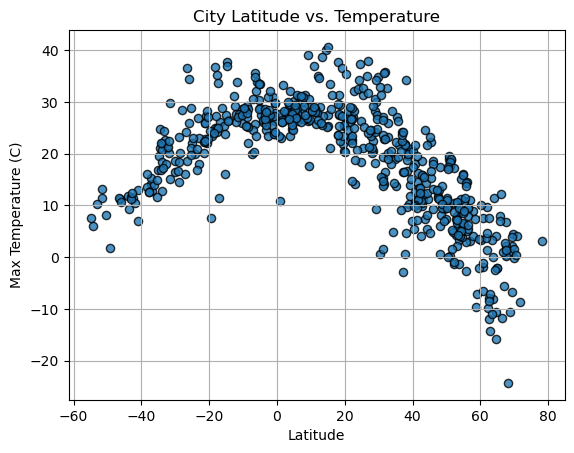

In [9]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x="Lat", y="Max Temp", s=35, alpha=0.8, edgecolor='black', marker='o', title="City Latitude vs. Temperature")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

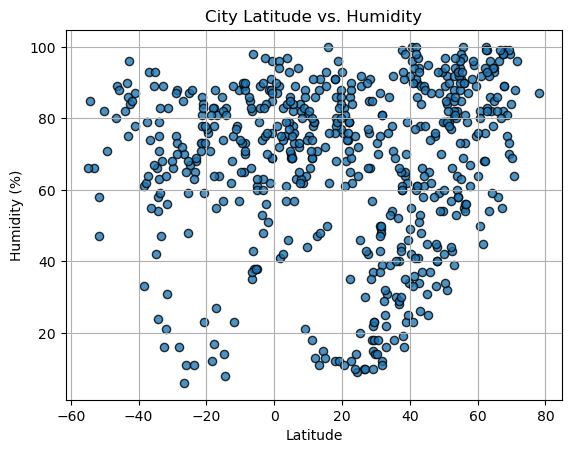

In [10]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x="Lat", y="Humidity", s=35, alpha=0.8, edgecolor='black', marker='o', title="City Latitude vs. Humidity")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

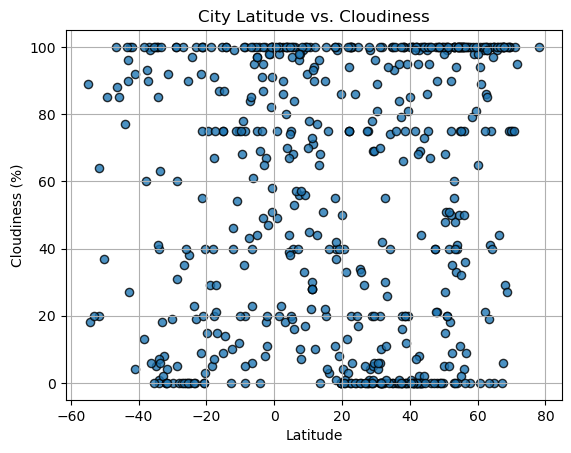

In [11]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x="Lat", y="Cloudiness", s=35, alpha=0.8, edgecolor='black', marker='o', title="City Latitude vs. Cloudiness")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

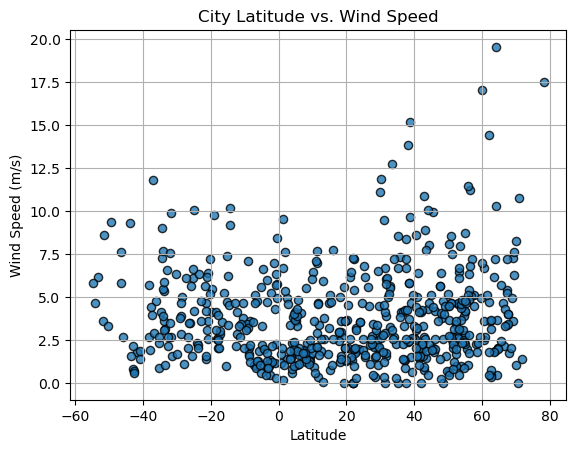

In [12]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x="Lat", y="Wind Speed", s=35, alpha=0.8, edgecolor='black', marker='o', title="City Latitude vs. Wind Speed")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, x_label, y_label):
    
    slope, intercept = np.polyfit(x, y, 1)
    trendline = slope * x + intercept
    r = np.corrcoef(x, y)[0, 1]
    
    print(f"the r-value is:{r}")

    plt.scatter(x, y, label="Data", color="blue")
    
    
    # Create a line plot for the linear trendline
    plt.plot(x, trendline, label="Linear Regression", color="red")
    # Customize the plot with labels and a title
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    # Show the legend

    # Display the plot
    plt.show()

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,turpan,42.9333,89.1667,15.90,26,0,0.76,CN,1697720872
2,ca mau,9.1769,105.1500,26.35,88,100,1.48,VN,1697720873
3,igarka,67.4667,86.5833,6.76,98,100,5.39,RU,1697720873
5,sinabang,2.4803,96.3801,26.55,83,100,1.39,ID,1697720873
6,ribeira grande,38.5167,-28.7000,20.37,64,20,5.81,PT,1697720873


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,6.00,85,18,4.64,GS,1697720872
4,puerto ayora,-0.7393,-90.3518,23.79,96,100,2.24,EC,1697720651
7,nadi,-17.8000,177.4167,24.15,83,20,2.06,FJ,1697720873
9,waitangi,-43.9535,-176.5597,11.77,82,77,9.32,NZ,1697720873
10,blackmans bay,-43.0167,147.3167,11.67,86,96,0.81,AU,1697720874


###  Temperature vs. Latitude Linear Regression Plot

the r-value is:-0.82656622053085


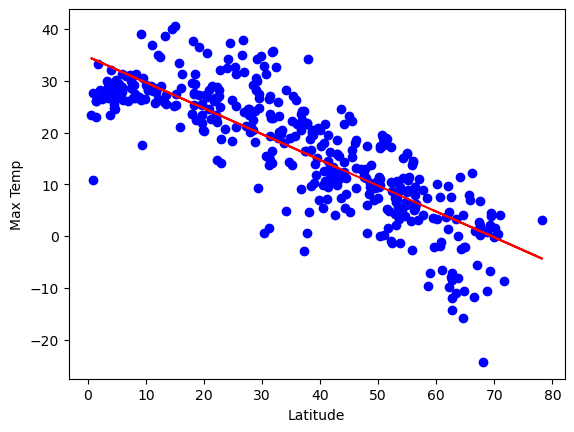

In [19]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"], "Latitude", "Max Temp")

the r-value is:0.7643318900146222


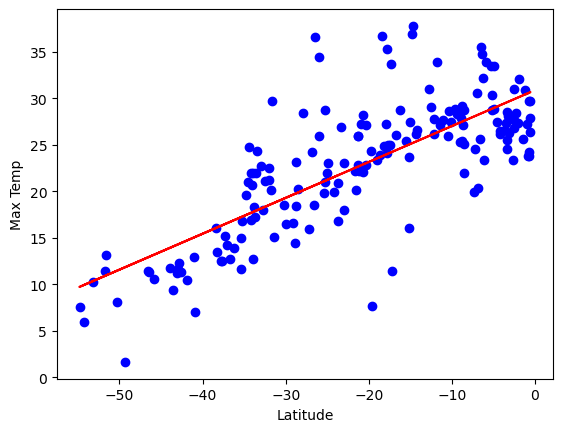

In [20]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"], "Latitude", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

the r-value is:0.159917312772545


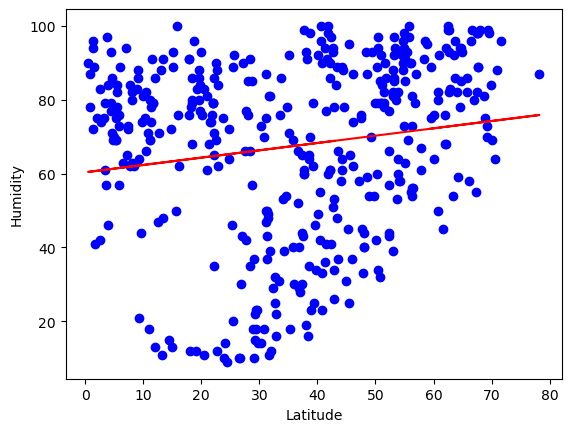

In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"], "Latitude", "Humidity")

the r-value is:0.02448721904742107


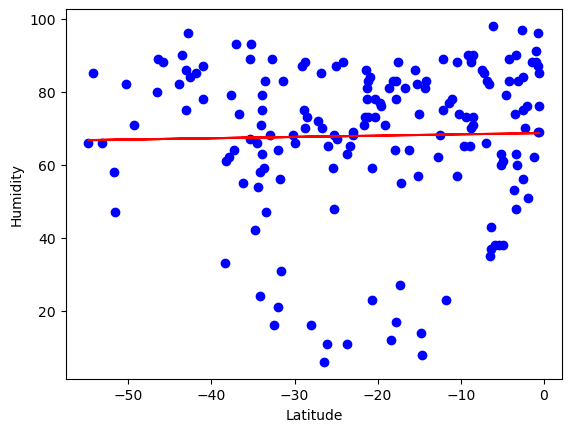

In [22]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"], "Latitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is:0.10850987704183775


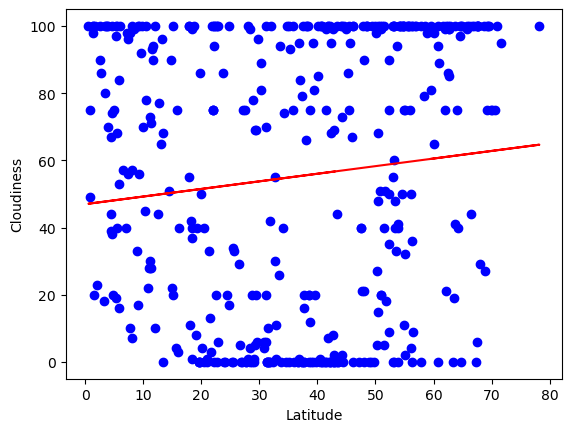

In [23]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

the r-value is:0.1066113001077482


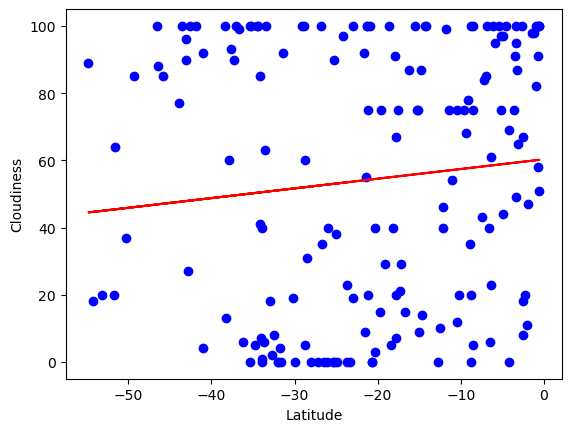

In [24]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is:0.20911219686526578


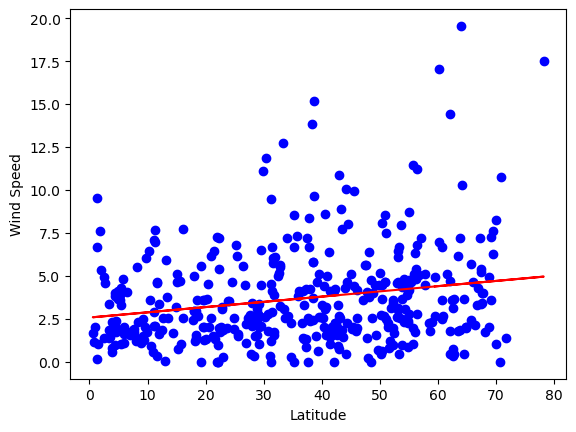

In [25]:
# Northern Hemisphere 
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

the r-value is:-0.21480095960298312


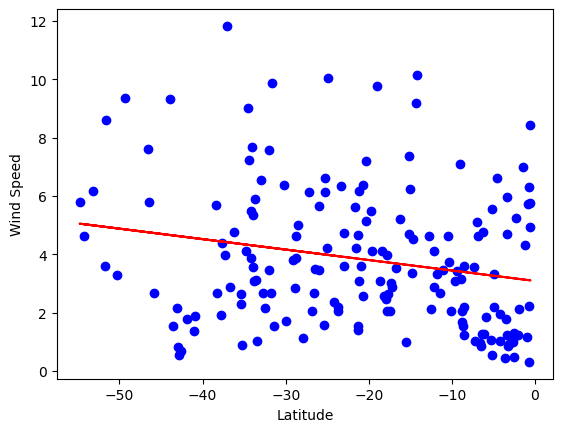

In [26]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE